**-------------------------------------------------------------------------------------------------------------------------------------------**

# **ALGORITMO DE REDES NEURONALES CONVOLUCIONES ENFOCADO A LA DIFERENCIACIÓN ENTRE OSOS Y PANDAS**

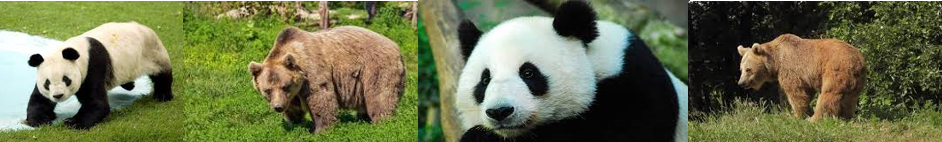

**-------------------------------------------------------------------------------------------------------------------------------------------**

**Creadores:**





### *-Santiago Figueroa*

### *-Diego Hermana*

### *-Daniel Vidal*
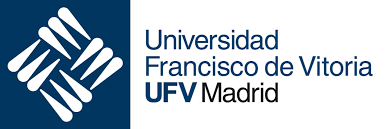



**-------------------------------------------------------------------------------------------------------------------------------------------**

### **¿Por qué hemos decidido crear una red neuronal con esta base de datos?**
Tras realizar la práctica anterior en la que creamos una red neuronal que diferenciaba distintos objetos y animales nos dimos cuenta que nos faltó mucho por mejorar y perfeccionar debido al tiempo, debido a ello hemos decidido volver a crear una red neuronal donde consigamos distinguir diferentes imágenes y tener una precision del 100% ya que en la anterior no conseguimos pasar del 44.6%.

Hemos decidido usar una base de datos la cual tiene imágenes de osos e imágenes de pandas, es una base de datos sencilla pero buena, es decir, es una database que tiene 500 imágenes de entrenamiento y 100 de test, la razón para elegir una base de datos con este número de imágenes se encuentra en que queriamos cumplir nuestro objetivo de tener un 100% de precisión y teniendo una base de datos pequeña podríamos ahorrar más tiempo en el simple hecho del entrenamiento y enfocarnos mas en crear una buena fase de entrenamiento y lograr los retos que no conseguimos en la anterior como la mejora de precisión y la mejora de la pérdida.

# **Creación Red Neuronal**

## **Conexión de Google Colab con los archivo de Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Nuestro objetivo principal fue implementar un modelo de red neuronal convolucional (CNN) utilizando TensorFlow y Keras para clasificar imágenes de osos y osos pandas. Comenzamos por montar el sistema de archivos de Google Drive y luego instalamos las bibliotecas necesarias. Nuestro dataset ha sido obtenido desde Kaggle del siguiente link: https://www.kaggle.com/datasets/mattop/panda-or-bear-image-classification
 La base de nuestro trabajo fue la carga de imágenes y etiquetas desde directorios de datos de entrenamiento y prueba. En este proceso, creamos una función para cargar las imágenes y etiquetas, normalizando los píxeles y asignando etiquetas numéricas a las clases "Bears" y "Pandas".


En el desarrollo de la implementación, nos enfrentamos a desafíos relacionados con la estructuración de los datos, la manipulación de imágenes y la preparación adecuada para el modelo de red neuronal. Utilizamos las bibliotecas os, numpy y PIL para gestionar directorios, manipular matrices de imágenes y realizar operaciones de preprocesamiento. Además, enfrentamos la tarea de definir la arquitectura del modelo, donde empleamos capas convolucionales, de pooling, aplanamiento y densas para extraer y clasificar características.


Compilamos el modelo con una función de pérdida binaria y el optimizador Adam, y procedimos con el entrenamiento utilizando los datos de entrenamiento y validación. Visualizamos gráficos de precisión y pérdida para evaluar el rendimiento del modelo durante el proceso de entrenamiento. Finalmente, seleccionamos una imagen de prueba, la preparamos y utilizamos el modelo entrenado para hacer predicciones, mostrando la imagen y la predicción correspondiente.


Al fin y al cabo, nuestro trabajo se centró en implementar una red neuronal para diferenciar los osos de los pandas, abordando desafíos en la carga y manipulación de datos, definición de arquitectura de modelo y evaluación del rendimiento. Utilizamos funciones como load_images_and_labels para cargar datos, visualize_image para visualizar imágenes con etiquetas y matplotlib para representar gráficamente la precisión y pérdida del modelo




##**Importación y descarga de librerias**

In [2]:
!pip install -q keras

In [3]:
import keras

In [4]:
!pip install tensorflow

In [5]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


Comenzamos el código montando un espacio en Google Drive para acceder a los datos almacenados, y luego instalamos las bibliotecas Keras y TensorFlow. Posteriormente, importamos las funciones y capas necesarias de TensorFlow para construir y entrenar un modelo de Redes Neuronales Convolucionales (CNN).








##**Proceso de importar las imagenes**

In [9]:
import os
import numpy as np
from PIL import Image

def load_images_and_labels(base_dir, target_size=(150, 150)):
    images = []
    labels = []
    label_dict = {'Bears': 0, 'Pandas': 1}  # Etiquetas para las clases

    for label in ('Bears', 'Pandas'):
        class_dir = os.path.join(base_dir, label)
        for file in os.listdir(class_dir):
            # Cargar y preprocesar la imagen
            img_path = os.path.join(class_dir, file)
            img = Image.open(img_path).resize(target_size)
            img_array = np.array(img) / 255.0  # Normalizar los píxeles

            # Agregar la imagen y su etiqueta a las listas
            images.append(img_array)
            labels.append(label_dict[label])

    return np.array(images), np.array(labels)

# Rutas a los directorios de datos
ruta_train = '/content/drive/MyDrive/PandasBears/Train'
ruta_test = '/content/drive/MyDrive/PandasBears/Test'

# Cargar las imágenes y etiquetas
train_images, train_labels = load_images_and_labels(ruta_train)
test_images, test_labels = load_images_and_labels(ruta_test)

print(f"Train Images: {train_images.shape}, Train Labels: {train_labels.shape}")
print(f"Test Images: {test_images.shape}, Test Labels: {test_labels.shape}")


Train Images: (500, 150, 150, 3), Train Labels: (500,)
Test Images: (100, 150, 150, 3), Test Labels: (100,)



Las dimensiones indicadas en la salida sugieren la siguiente estructura de los conjuntos de datos:

Train Images: (500, 150, 150, 3): Este conjunto contiene 500 imágenes para el entrenamiento. Cada imagen tiene una resolución de 150x150 píxeles y 3 canales de color (RGB). La presencia de 3 canales indica que las imágenes están en color y no en escala de grises.

Train Labels: (500,): Este conjunto contiene 500 etiquetas correspondientes a las imágenes de entrenamiento. Cada etiqueta es probablemente un número que representa la clase a la que pertenece la imagen (por ejemplo, 0 para 'Bears', 1 para 'Pandas'). La forma (500,) indica un vector unidimensional con 500 elementos.

Test Images: (100, 150, 150, 3): Este conjunto contiene 100 imágenes para pruebas. Al igual que las imágenes de entrenamiento, cada imagen de prueba tiene una resolución de 150x150 píxeles con 3 canales de color.

Test Labels: (100,): Este conjunto contiene 100 etiquetas correspondientes a las imágenes de prueba. Al igual que las etiquetas de entrenamiento, se trata de un vector unidimensional con 100 elementos que representan las clases de las imágenes correspondientes.

##**Exploración y Visualización de Datos**

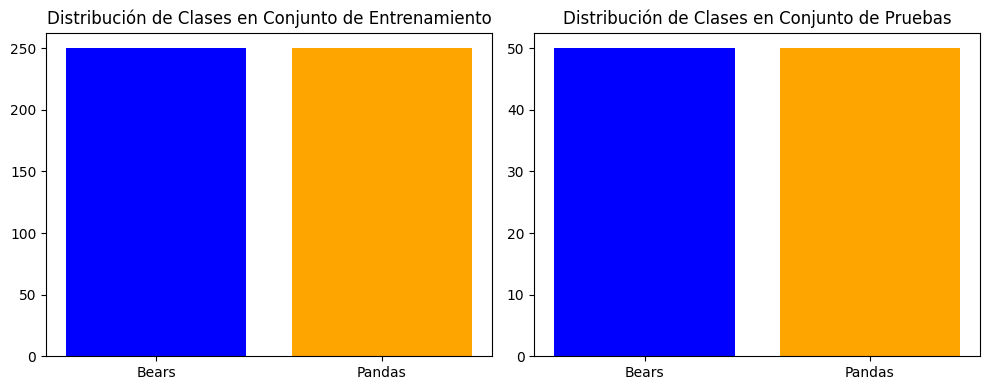

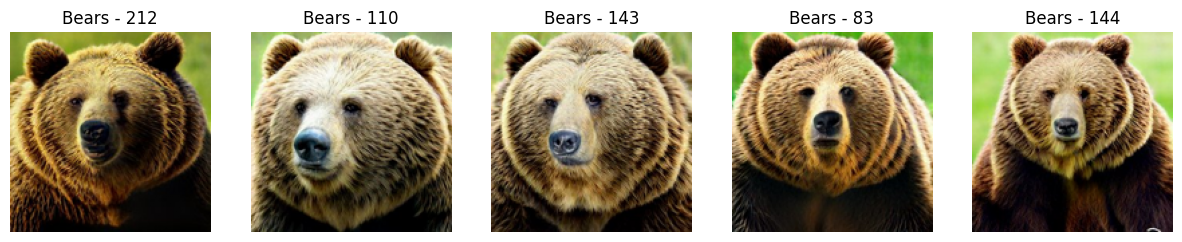

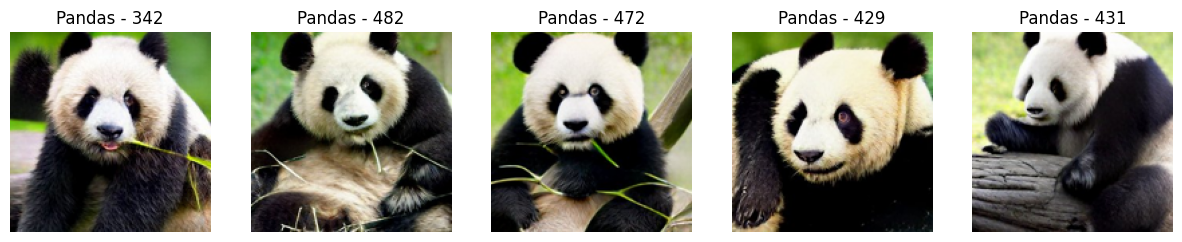

In [10]:
import matplotlib.pyplot as plt

# Definir el diccionario de clases
class_dict = {'Bears': 0, 'Pandas': 1}
# Exploración de Datos
class_distribution_train = {'Bears': np.sum(train_labels == 0), 'Pandas': np.sum(train_labels == 1)}
class_distribution_test = {'Bears': np.sum(test_labels == 0), 'Pandas': np.sum(test_labels == 1)}

# Visualización de la distribución de clases en conjuntos de entrenamiento y prueba
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(class_distribution_train.keys(), class_distribution_train.values(), color=['blue', 'orange'])
plt.title('Distribución de Clases en Conjunto de Entrenamiento')

plt.subplot(1, 2, 2)
plt.bar(class_distribution_test.keys(), class_distribution_test.values(), color=['blue', 'orange'])
plt.title('Distribución de Clases en Conjunto de Pruebas')

plt.tight_layout()
plt.show()

# Visualizar algunas imágenes de cada clase
def visualize_samples(images, labels, class_name, num_samples=5):
    class_indices = np.where(labels == class_dict[class_name])[0]
    sample_indices = np.random.choice(class_indices, num_samples, replace=False)

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx])
        plt.title(f'{class_name} - {idx}')
        plt.axis('off')

    plt.show()

# Visualizar algunas imágenes de la clase Bears y Pandas en el conjunto de entrenamiento
visualize_samples(train_images, train_labels, class_name='Bears')
visualize_samples(train_images, train_labels, class_name='Pandas')


En la sección de exploración y visualización de datos, cargamos imágenes y etiquetas del conjunto de entrenamiento, visualizamos la distribución de clases en los conjuntos de entrenamiento y prueba, y presentamos ejemplos visuales de imágenes de osos y osos pandas en el conjunto de entrenamiento.








##**Construcción de la arquitectura de la red**

In [11]:
model = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Tercera capa convolucional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Cuarta capa convolucional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Capa de aplanamiento
    Flatten(),
    # Capa densa
    Dense(512, activation='relu'),
    # Capa de salida
    Dense(1, activation='sigmoid')
])



La arquitectura de nuestro modelo es una red neuronal convolucional (CNN) con cuatro capas convolucionales, seguidas de capas de MaxPooling para reducir dimensiones. Posteriormente, hay una capa de aplanamiento (Flatten) que prepara los datos para capas densas. El modelo incluye una capa densa con 512 neuronas y función de activación ReLU, seguida por una capa de salida con una neurona y activación sigmoid para la clasificación binaria entre osos y pandas.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

Nuestro modelo es una CNN con cuatro capas convolucionales seguidas de MaxPooling. La última capa es una red neuronal densa con una neurona de salida, totalizando 3,453,121 parámetros entrenables y un tamaño de 13.17 MB.








####Justificación del número de parametros:



Capas Convolucionales (Conv2D):

La primera capa convolucional tiene 32 filtros con un tamaño de kernel de 3x3 y la entrada tiene 3 canales (suponiendo imágenes a color). La fórmula para calcular el número de parámetros es (tamaño_kernel * tamaño_kernel * canales_entrada + 1) * filtros, donde el "+ 1" representa el sesgo para cada filtro. Por tanto: (3 * 3 * 3 + 1) * 32 = 896.

La segunda capa convolucional tiene 64 filtros con un tamaño de kernel de 3x3. Los canales de entrada serán iguales al número de filtros de la capa anterior, es decir, 32. Así que: (3 * 3 * 32 + 1) * 64 = 18,496.

La tercera capa convolucional tiene 128 filtros, y la entrada viene de la capa anterior que tiene 64 canales: (3 * 3 * 64 + 1) * 128 = 73,856.

La cuarta capa convolucional es similar a la tercera, con 128 filtros y 128 canales de entrada: (3 * 3 * 128 + 1) * 128 = 147,584.

Capa de Aplanamiento (Flatten):

No hay parámetros aprendibles aquí; simplemente transforma la salida tridimensional de la última capa de MaxPooling a un vector unidimensional.
Capas Densas (Dense):

La primera capa densa tiene 512 unidades. La entrada a esta capa es el resultado aplanado de la salida de la última capa de MaxPooling, que tiene un tamaño de 7x7x128 = 6272. Entonces, el número de parámetros es (6272 + 1) * 512 = 3,211,776, donde el "+ 1" es para el término de sesgo.

La segunda capa densa es la capa de salida con 1 unidad (para clasificación binaria con activación sigmoid). Los parámetros aquí son (512 + 1) * 1 = 513, ya que tiene 512 entradas de la capa anterior más 1 de sesgo.

La suma de todos estos parámetros da el total de parámetros entrenables en la red, que es 3,453,121. Las capas de MaxPooling no tienen parámetros, ya que solo reducen la dimensión espacial de la entrada utilizando el valor máximo de la ventana del kernel especificada (en este caso, 2x2).

##**Configuración del Modelo para Entrenamiento**

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Especificamos la función de pérdida ('binary_crossentropy') para problemas de clasificación binaria, el optimizador ('adam') para ajustar los pesos eficientemente, y la métrica ('accuracy') para evaluar la precisión del modelo.

##**Entrenamiento con Datos Aumentados para Mejorar el Modelo**




In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear un generador de aumento de datos
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Ajustar el generador al conjunto de entrenamiento
datagen.fit(train_images)

# Entrenar el modelo utilizando el generador de aumento de datos
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=7,
    validation_data=(test_images, test_labels)
)

Epoch 1/7
16/16 [==============================] - 11s 205ms/step - loss: 0.4394 - accuracy: 0.7740 - val_loss: 0.0646 - val_accuracy: 0.9500
Epoch 2/7
16/16 [==============================] - 3s 162ms/step - loss: 0.3050 - accuracy: 0.9260 - val_loss: 0.0491 - val_accuracy: 0.9700
Epoch 3/7
16/16 [==============================] - 3s 165ms/step - loss: 0.1096 - accuracy: 0.9660 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 4/7
16/16 [==============================] - 4s 277ms/step - loss: 0.0310 - accuracy: 0.9900 - val_loss: 0.0130 - val_accuracy: 0.9900
Epoch 5/7
16/16 [==============================] - 3s 162ms/step - loss: 0.0414 - accuracy: 0.9840 - val_loss: 0.0456 - val_accuracy: 0.9800
Epoch 6/7
16/16 [==============================] - 3s 164ms/step - loss: 0.0436 - accuracy: 0.9860 - val_loss: 0.0800 - val_accuracy: 0.9800
Epoch 7/7
16/16 [==============================] - 3s 197ms/step - loss: 0.0188 - accuracy: 0.9920 - val_loss: 0.0069 - val_accuracy: 1.0000


A lo largo de las siete épocas de entrenamiento, observamos mejoras consistentes en la precisión y pérdida de nuestro modelo tanto en el conjunto de entrenamiento como en el de validación. Al finalizar, logramos alcanzar una precisión del 100% en ambos conjuntos, lo que sugiere un buen ajuste y la capacidad del modelo para generalizar adecuadamente.

Implementamos aumentación de datos en nuestro conjunto de entrenamiento utilizando un generador. Aunque notamos una disminución temporal en la precisión en el conjunto de entrenamiento, entendemos que esto es normal ya que la aumentación de datos introduce variaciones más diversas en las imágenes de entrenamiento. Esta técnica es crucial para mejorar la capacidad de generalización del modelo al exponerlo a diferentes variaciones. Nos enfocamos en evaluar el rendimiento en el conjunto de validación y observamos que, a pesar de la fluctuación en la precisión del conjunto de entrenamiento, nuestro modelo demuestra un buen rendimiento y no muestra signos de sobreajuste, lo que indica que la aumentación de datos está contribuyendo efectivamente a la capacidad de generalización del modelo.












##**Evaluación y Visualización:**

Después del entrenamiento, se evalua el rendimiento del modelo en el conjunto de prueba. También es útil visualizar el historial de entrenamiento para ver cómo evolucionan la precisión y la pérdida con cada época.

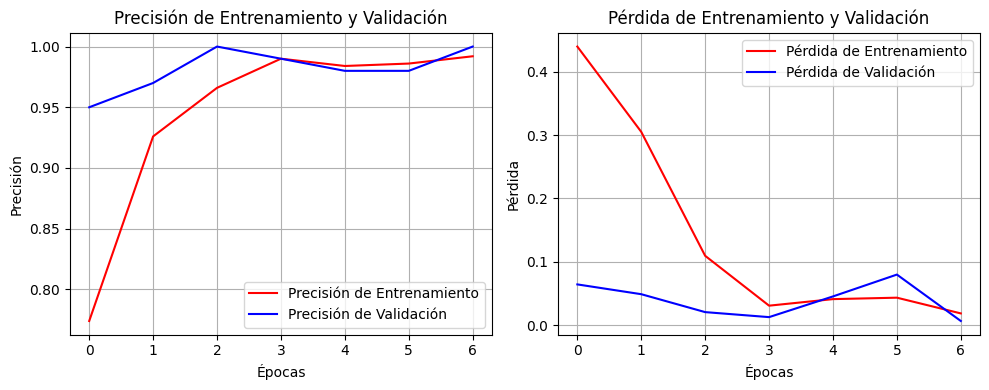

In [15]:
import matplotlib.pyplot as plt

# Extraer datos de precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Crear gráfico para la precisión
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Crear gráfico para la pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Pérdida de Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


El gráfico de "Precisión de Entrenamiento y Validación" exhibe dos líneas que trazan la evolución de la precisión a lo largo de las épocas para los conjuntos de entrenamiento y validación. La precisión, como métrica, es un indicador de la cantidad de resultados verdaderamente positivos obtenidos por el modelo en comparación con la cantidad total de casos que el modelo afirmó ser positivos. En el caso presente, la precisión de entrenamiento muestra un ascenso constante a lo largo de las épocas, alcanzando finalmente el 100%. Esto significa que, al final del entrenamiento, el modelo ha aprendido a identificar cada ejemplo de entrenamiento correctamente. La precisión de validación también aumenta, aunque no de forma tan uniforme, reflejando la habilidad del modelo para generalizar a datos no vistos durante el entrenamiento. La brecha entre ambas líneas es un área de interés, ya que una brecha pequeña es ideal y sugiere que el modelo está generalizando bien, mientras que una brecha más grande podría requerir una revisión de la complejidad del modelo o de la representatividad del conjunto de validación.

El gráfico de "Pérdida de Entrenamiento y Validación" muestra el valor de la función de pérdida para ambos conjuntos a lo largo del tiempo. La función de pérdida cuantifica la diferencia entre las predicciones del modelo y los valores verdaderos, siendo un indicador clave de la precisión de las predicciones del modelo. Una disminución en el valor de la pérdida durante el entrenamiento es una señal de que el modelo está mejorando su capacidad de hacer predicciones precisas. En este caso, la pérdida de entrenamiento disminuye significativamente, lo que es coherente con la precisión de entrenamiento alcanzando el 100%. Sin embargo, la pérdida de validación muestra variabilidad y picos, lo que puede indicar que el modelo está experimentando dificultades para generalizar a partir de ciertos datos de validación. Es importante notar que a pesar de estas fluctuaciones, la tendencia general de la pérdida de validación es descendente, lo cual es un indicador positivo.

La estabilidad en las métricas de validación hacia las últimas épocas y la convergencia de la precisión de entrenamiento al 100% sugieren que el modelo ha alcanzado un estado en el que su rendimiento en el conjunto de entrenamiento es óptimo. La capacidad de mantener una alta precisión de validación hacia las últimas épocas implica que el modelo no solo ha memorizado los datos de entrenamiento, sino que también ha aprendido patrones generalizables que aplican a nuevos datos. La importancia de esta generalización no puede subestimarse, ya que garantiza la utilidad del modelo en entornos de aplicación reales, donde se encontrará con ejemplos que no formaron parte de su conjunto de entrenamiento inicial.

**Mátriz de confusión**

4/4 [==============================] - 0s 9ms/step


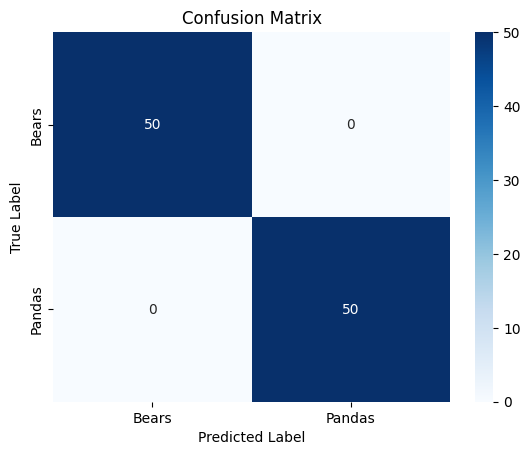

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar predicciones en el conjunto de prueba
test_predictions = model.predict(test_images)
test_predictions = np.round(test_predictions).astype(int)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Crear un diccionario para mapear 0 a 'Bears' y 1 a 'Pandas'
labels = {0: 'Bears', 1: 'Pandas'}

# Visualizar la matriz de confusión con Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[labels[i] for i in range(conf_matrix.shape[1])],
            yticklabels=[labels[i] for i in range(conf_matrix.shape[0])])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Los resultados Dde la matriz de confusión pueden interpretarse de la siguiente manera:

La celda superior izquierda (50 Bears, True Label - Bears, Predicted Label) indica que hay 50 imágenes de osos (Bears) que fueron correctamente clasificadas como osos por el modelo. Esto es conocido como verdaderos positivos para la clase 'Bears'.

La celda superior derecha (0 Bears, True Label - Bears, Predicted Label - Pandas) muestra que no hay imágenes de osos que hayan sido incorrectamente clasificadas como pandas. Esto significa que no hay falsos negativos para la clase 'Bears'.

La celda inferior izquierda (0 Pandas, True Label - Pandas, Predicted Label - Bears) indica que no hay imágenes de pandas que hayan sido incorrectamente clasificadas como osos. Esto significa que no hay falsos positivos para la clase 'Pandas'.

La celda inferior derecha (50 Pandas, True Label - Pandas, Predicted Label - Pandas) muestra que hay 50 imágenes de pandas que fueron correctamente clasificadas como pandas por el modelo. Esto es conocido como verdaderos positivos para la clase 'Pandas'.

En resumen, el clasificador ha logrado un rendimiento perfecto en este conjunto de datos de prueba, ya que todas las imágenes de osos y pandas han sido clasificadas correctamente sin errores.

##**Ejemplo de predicción**

Imagen real:


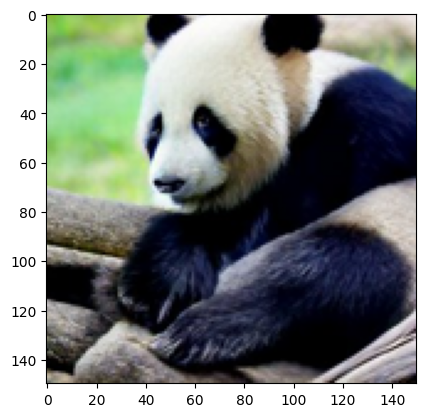

1/1 [==============================] - 0s 353ms/step


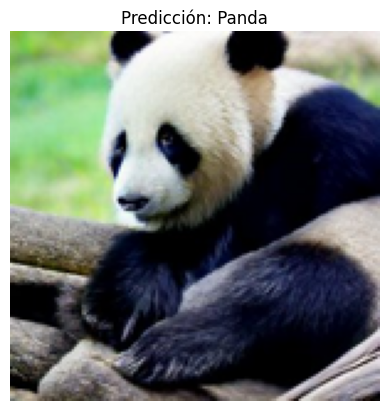

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar una imagen de prueba (por ejemplo, la primera imagen del conjunto de prueba)
test_image = test_images[78]
# Muestra la imagen
print("Imagen real:")
plt.imshow(test_image)
plt.show()


# Preparar la imagen (agregar una dimensión extra al principio)
img = np.expand_dims(test_image, axis=0)

# Hacer la predicción
predictions = model.predict(img)

# Visualizar la imagen y la predicción
plt.imshow(test_image)
plt.title(f"Predicción: {'Panda' if predictions[0][0] > 0.5 else 'Bear'}")
plt.axis('off')
plt.show()


Como se puede observar, la red neuronal predice correctamente que es un Panda

##**Metodología de mejora**

Definimos de nuevo el modelo base para plantear comparaciónes, frente a dos alternativas.

En el modelo Mejora 1: Se cambia la arquitectura y en el modelo Mejora 2 se realiza un ajuste en Hiperparámetros


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definir Caso Base
base_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
base_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar Caso Base
base_history = base_model.fit(train_images, train_labels, epochs=7, validation_data=(test_images, test_labels))

# Metodología de Mejora 1: Cambiar Arquitectura
improved_model_1 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])
improved_model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar Mejora 1
history_improved_1 = improved_model_1.fit(train_images, train_labels, epochs=7, validation_data=(test_images, test_labels))

# Metodología de Mejora 2: Ajuste en Hiperparámetros
improved_model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])
improved_model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar Mejora 2
history_improved_2 = improved_model_2.fit(train_images, train_labels, epochs=7, validation_data=(test_images, test_labels))

def compare_metrics(history_base, history_improved_1, history_improved_2):
    # Extraer datos de precisión y pérdida
    acc_base = history_base.history['accuracy']
    val_acc_base = history_base.history['val_accuracy']
    loss_base = history_base.history['loss']
    val_loss_base = history_base.history['val_loss']

    acc_improved_1 = history_improved_1.history['accuracy']
    val_acc_improved_1 = history_improved_1.history['val_accuracy']
    loss_improved_1 = history_improved_1.history['loss']
    val_loss_improved_1 = history_improved_1.history['val_loss']

    acc_improved_2 = history_improved_2.history['accuracy']
    val_acc_improved_2 = history_improved_2.history['val_accuracy']
    loss_improved_2 = history_improved_2.history['loss']
    val_loss_improved_2 = history_improved_2.history['val_loss']

    # Realizar comparaciones y visualizaciones necesarias...


# Comparar Métricas con el Caso Base
compare_metrics(base_history, history_improved_1, history_improved_2)



Epoch 1/7
16/16 [==============================] - 2s 72ms/step - loss: 1.9656 - accuracy: 0.8720 - val_loss: 1.0694e-06 - val_accuracy: 1.0000
Epoch 2/7
16/16 [==============================] - 1s 40ms/step - loss: 0.2013 - accuracy: 0.9900 - val_loss: 1.6599e-04 - val_accuracy: 1.0000
Epoch 3/7
16/16 [==============================] - 1s 41ms/step - loss: 0.0229 - accuracy: 0.9900 - val_loss: 0.2350 - val_accuracy: 0.9800
Epoch 4/7
16/16 [==============================] - 1s 39ms/step - loss: 0.0280 - accuracy: 0.9900 - val_loss: 9.7275e-04 - val_accuracy: 1.0000
Epoch 5/7
16/16 [==============================] - 1s 42ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 3.6157e-14 - val_accuracy: 1.0000
Epoch 6/7
16/16 [==============================] - 1s 40ms/step - loss: 0.0261 - accuracy: 0.9980 - val_loss: 1.2265e-12 - val_accuracy: 1.0000
Epoch 7/7
16/16 [==============================] - 1s 40ms/step - loss: 0.0077 - accuracy: 0.9960 - val_loss: 2.2733e-14 - val_accuracy: 1.0

En las primeras 7 épocas del entrenamiento, observamos un comportamiento positivo en los tres modelos, alcanzando altos niveles de precisión tanto en el conjunto de entrenamiento como en el de validación. Sin embargo, el primer modelo parece ser más susceptible al sobreajuste, ya que obtiene una precisión del 100% en el conjunto de entrenamiento en las últimas épocas, pero no logra mejorar significativamente en el conjunto de validación. Los modelos 2 y 3 muestran una mayor estabilidad y generalización, con una precisión del 100% en el conjunto de validación y un rendimiento consistente en todas las épocas.

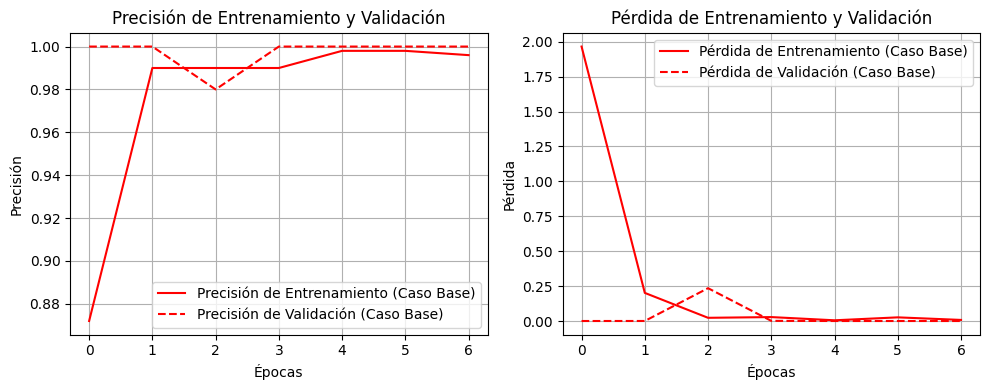

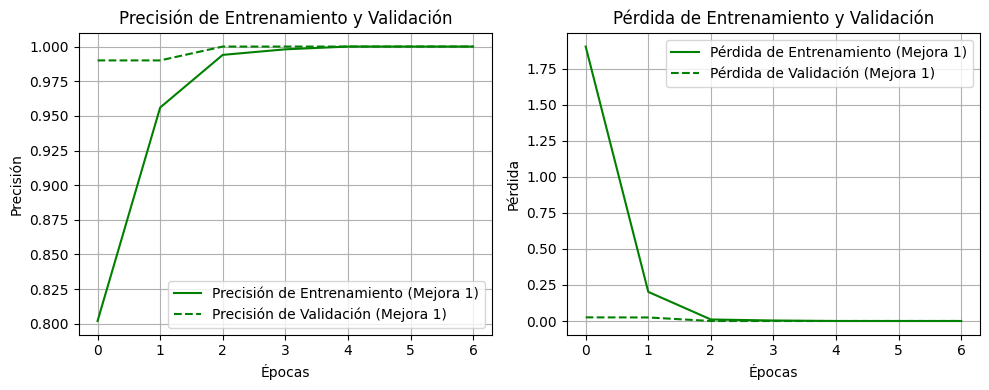

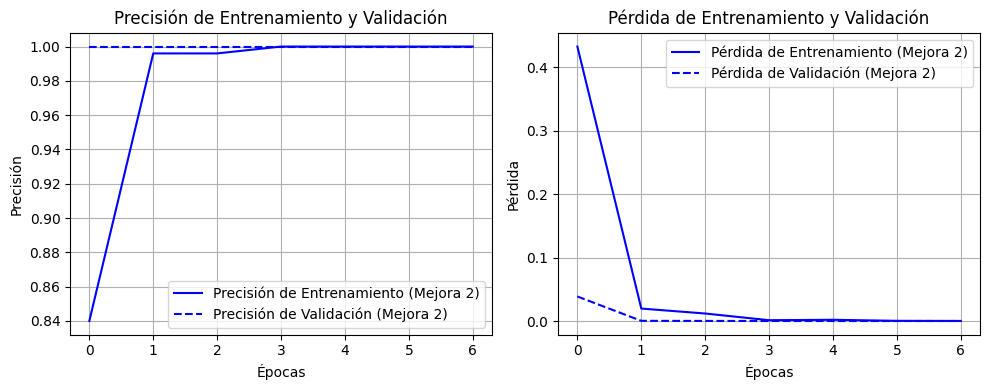

In [19]:
import matplotlib.pyplot as plt

def plot_metrics(history, label, color='b'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    # Crear gráfico para la precisión
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, f'{color}-', label=f'Precisión de Entrenamiento ({label})')
    plt.plot(epochs, val_acc, f'{color}--', label=f'Precisión de Validación ({label})')
    plt.title('Precisión de Entrenamiento y Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

    # Crear gráfico para la pérdida
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, f'{color}-', label=f'Pérdida de Entrenamiento ({label})')
    plt.plot(epochs, val_loss, f'{color}--', label=f'Pérdida de Validación ({label})')
    plt.title('Pérdida de Entrenamiento y Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()

# Comparar gráficamente las métricas
plot_metrics(base_history, 'Caso Base', color='r')
plot_metrics(history_improved_1, 'Mejora 1', color='g')
plot_metrics(history_improved_2, 'Mejora 2', color='b')

plt.show()


**Comparación de "Mejora 1" con el "Caso Base":**

Precisión:

En el caso base, la precisión de entrenamiento muestra una variabilidad más alta y una tendencia a la baja después de la primera época, mientras que la precisión de validación es significativamente más baja y también presenta una tendencia descendente, lo que podría indicar sobreajuste.
En la mejora 1, la precisión de entrenamiento es más estable y mantiene un alto nivel sin caer abruptamente, y la precisión de validación se mantiene más cercana a la de entrenamiento, lo que sugiere que la mejora ha reducido el sobreajuste y mejorado la generalización.


Pérdida:



Para el caso base, la pérdida de entrenamiento disminuye rápidamente y luego se estabiliza, pero la pérdida de validación, aunque disminuye, permanece relativamente alta en comparación con la de entrenamiento, lo que indica que podría haber espacio para mejorar en términos de generalización.
Con la mejora 1, la pérdida de entrenamiento y validación muestra una convergencia más rápida y se estabiliza a niveles bajos, lo que indica que el modelo generaliza mejor desde el principio y el sobreajuste es menos pronunciado.



**Comparación de "Mejora 2" con el "Caso Base":**

Precisión:

Comparado con el caso base, la mejora 2 muestra una precisión de entrenamiento y de validación excepcionalmente estables y alineadas desde el inicio. Esto sugiere que la mejora 2 ha llevado a un modelo que es consistente a través de las épocas y generaliza muy bien desde el comienzo.


Pérdida:

La mejora 2 muestra una reducción dramática en la pérdida de entrenamiento y validación durante las primeras épocas, estabilizándose en valores muy bajos. Esto contrasta con la pérdida más alta y la disminución más gradual observada en el caso base. Indica que la mejora 2 ha resultado en un aprendizaje más efectivo y eficiente del modelo.







**En resumen,** las mejoras implementadas parecen haber abordado el sobreajuste visto en el caso base, como se evidencia por la disminución de la brecha entre la precisión y la pérdida de entrenamiento y validación. Además, la estabilización temprana en las métricas sugiere que el modelo mejorado aprende patrones consistentes rápidamente y se generaliza bien a nuevos datos. La mejora 2, en particular, muestra el comportamiento más estable y deseable tanto en términos de precisión como de

# **Conclusión**

En conclusión, estamos muy contentos ya que hemos conseguido nuestro objetivo principal que no conseguimos en la anterior práctica, tener una precisión del 100%, con esta red neuronal no hay fallo a la hora de distinguir entre un panda y un oso.

Precisión esta práctica de red neuronal


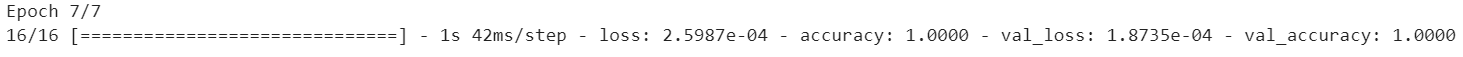

Precisión práctica anterior


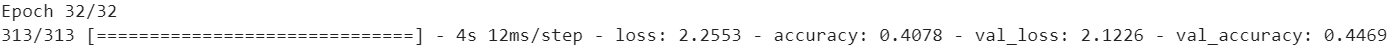

Como se puede observar hemos conseguido aumentar al máximo la precisión y a su vez reducir la pérdida, son distintas bases de datos con una diferencia considerable de datos pero hemos conseguido nuestro objetivo de crear una red neuronal 100% efectiva. Al escoger una base de datos la cual tiene menos imágenes hemos podido reducir el tiempo de ejecución de entrenamiento de la red y así centrar más nuestro esfuerzo en la modificación de la estrucutra de la red neuronal y así mejorar cada vez mas la precisión de la red, en un principio conseguimos un 74% de accuracy pero tras unos ajustes en las capas pudimos obtener el 100% en 7 épocas.